In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [3]:
# loading data
x_train = pd.read_csv("Diabetes_XTrain.csv")
y_train = pd.read_csv("Diabetes_YTrain.csv")
x_test = pd.read_csv("Diabetes_Xtest.csv")

print(x_train.head())
print(x_train.values[0:5])
print(y_train.head())
values = pd.value_counts(y_train["Outcome"])




print(values)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            7      168             88             42      321  38.2   
1            8      110             76              0        0  27.8   
2            7      147             76              0        0  39.4   
3            2      100             66             20       90  32.9   
4            4      129             86             20      270  35.1   

   DiabetesPedigreeFunction  Age  
0                     0.787   40  
1                     0.237   58  
2                     0.257   43  
3                     0.867   28  
4                     0.231   23  
[[7.00e+00 1.68e+02 8.80e+01 4.20e+01 3.21e+02 3.82e+01 7.87e-01 4.00e+01]
 [8.00e+00 1.10e+02 7.60e+01 0.00e+00 0.00e+00 2.78e+01 2.37e-01 5.80e+01]
 [7.00e+00 1.47e+02 7.60e+01 0.00e+00 0.00e+00 3.94e+01 2.57e-01 4.30e+01]
 [2.00e+00 1.00e+02 6.60e+01 2.00e+01 9.00e+01 3.29e+01 8.67e-01 2.80e+01]
 [4.00e+00 1.29e+02 8.60e+01 2.00e+01 2.70e+02 3.51e+01 2

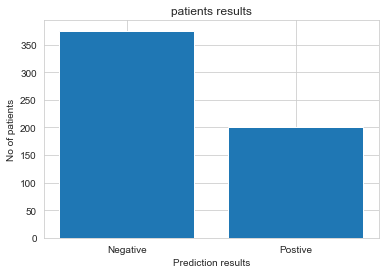

In [4]:
sns.set_style("whitegrid")
plt.bar([0,1], values,tick_label = ["Negative", "Postive"] )
plt.xlabel("Prediction results") 
plt.ylabel("No of patients")
plt.title("patients results")
plt.show()

In [5]:
x_train = x_train.values
std = StandardScaler()
std.fit_transform(x_train)

array([[ 0.97457151,  1.52528095,  0.94599501, ...,  0.78036618,
         0.907501  ,  0.59363371],
       [ 1.27524274, -0.31683408,  0.35393439, ..., -0.49918316,
        -0.72639999,  2.11034006],
       [ 0.97457151,  0.85830827,  0.35393439, ...,  0.92800649,
        -0.66698541,  0.8464181 ],
       ...,
       [-0.52878465,  0.06429317, -0.43547977, ..., -0.25311598,
         0.69954996, -0.92307263],
       [ 0.07255781,  1.0806325 ,  0.15658085, ..., -0.06856559,
        -0.42635635,  0.34084932],
       [-0.82945588, -1.01556737,  0.45261116, ...,  0.01755792,
        -0.34614667, -0.33324239]])

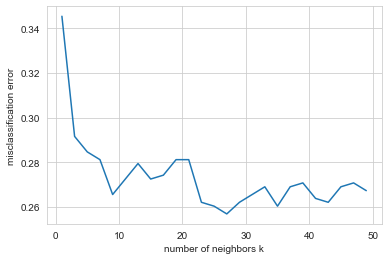

[0 0 0 0 0]


In [9]:
cv_scores = []

for i in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=i, algorithm="brute", n_jobs = -1)
    scores = cross_val_score(knn , x_train , y_train.values, scoring = "accuracy" )
    cv_scores.append(scores.mean())
    
mse = [1-x for x in cv_scores]

k = list(range(1,50,2))
optimal_k = k[mse.index(min(mse))]
plt.plot(k, mse) #plotting error plot
plt.xlabel('number of neighbors k')
plt.ylabel('misclassification error')
plt.show()

model = KNeighborsClassifier(n_neighbors=optimal_k, algorithm = 'brute', n_jobs = -1)
model.fit(x_train, y_train)
pred = model.predict(x_test)
print(pred[0:5])

In [8]:
df = pd.DataFrame(pred, columns = {'Outcome'})
df.to_csv('result1.csv', index = False)